In [1]:
%load_ext dotenv
%dotenv ../src/.env
import sys
sys.path.append("../src")
from logger import get_logger
_logs = get_logger(__name__) # receives a name of the logging module. 

In [4]:
import dask
dask.config.set({'dataframe.query-planning': True})
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

In [17]:


ft_dir

'../data/prices/'

In [26]:
ft_dir = os.getenv("PRICE_DATA")
ft_glob = glob(ft_dir+'*/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()

In [27]:
df = dd.read_parquet(ft_glob).compute().reset_index()


In [30]:
df.drop('index', axis = 1, inplace=True)

In [31]:
df.values

array([[Timestamp('2013-12-02 00:00:00-0500', tz='America/New_York'),
        31.886691297666324, 32.011633086635996, ..., 0.0, 'ABBV', 2013],
       [Timestamp('2013-12-03 00:00:00-0500', tz='America/New_York'),
        32.3075498247224, 33.050628224333785, ..., 0.0, 'ABBV', 2013],
       [Timestamp('2013-12-04 00:00:00-0500', tz='America/New_York'),
        32.71526353975656, 33.07036448977037, ..., 0.0, 'ABBV', 2013],
       ...,
       [Timestamp('2024-01-29 00:00:00-0500', tz='America/New_York'),
        94.43150916283344, 95.30696734531783, ..., 0.0, 'MMM', 2024],
       [Timestamp('2024-01-30 00:00:00-0500', tz='America/New_York'),
        94.59872869789046, 94.93317752465357, ..., 0.0, 'MMM', 2024],
       [Timestamp('2024-01-31 00:00:00-0500', tz='America/New_York'),
        94.37248978875743, 94.37248978875743, ..., 0.0, 'MMM', 2024]],
      dtype=object)

In [32]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,year
0,2013-12-02 00:00:00-05:00,31.886691,32.011633,31.577622,31.820930,4321900,0.0,0.0,ABBV,2013
1,2013-12-03 00:00:00-05:00,32.307550,33.050628,32.202335,32.859928,9480100,0.0,0.0,ABBV,2013
2,2013-12-04 00:00:00-05:00,32.715264,33.070364,32.419346,32.662655,5309200,0.0,0.0,ABBV,2013
3,2013-12-05 00:00:00-05:00,32.498247,32.925683,32.254938,32.721828,5449100,0.0,0.0,ABBV,2013
4,2013-12-06 00:00:00-05:00,32.991443,33.866043,32.912532,33.767403,7285800,0.0,0.0,ABBV,2013
...,...,...,...,...,...,...,...,...,...,...
23017,2024-01-25 00:00:00-05:00,92.247775,94.706929,92.080554,94.411835,6122900,0.0,0.0,MMM,2024
23018,2024-01-26 00:00:00-05:00,94.647914,95.316805,94.224940,94.421669,3720200,0.0,0.0,MMM,2024
23019,2024-01-29 00:00:00-05:00,94.431509,95.306967,93.880661,94.805298,3800000,0.0,0.0,MMM,2024
23020,2024-01-30 00:00:00-05:00,94.598729,94.933178,93.231440,94.185593,3200500,0.0,0.0,MMM,2024


In [ ]:
# This wont work for now.
# ft_dir = os.getenv("FEATURES_DATA")
# ft_glob = glob(ft_dir+'/*.parquet')
# df = dd.read_parquet(ft_glob).compute().reset_index()

# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [33]:
df.sample(n = 5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,year
17827,2023-10-09 00:00:00-04:00,106.010002,107.309998,104.790001,106.970001,39593200,0.0,0.0,AMD,2023
18341,2015-08-25 00:00:00-04:00,28.603874,28.603874,26.381069,26.411638,2437800,0.0,0.0,AOS,2015
15801,2015-09-21 00:00:00-04:00,1.870000,1.900000,1.810000,1.810000,5377800,0.0,0.0,AMD,2015
18148,2014-11-17 00:00:00-05:00,23.013778,23.347123,22.966157,23.338465,856400,0.0,0.0,AOS,2014
20267,2023-04-20 00:00:00-04:00,66.349497,67.656829,66.349497,67.597847,880800,0.0,0.0,AOS,2023


In [36]:
simple_sample_dt = df.sample(frac = 0.1)
simple_sample_dt.shape, df.shape

((2302, 10), (23022, 10))

Look at the distribution of tickers.

<Axes: >

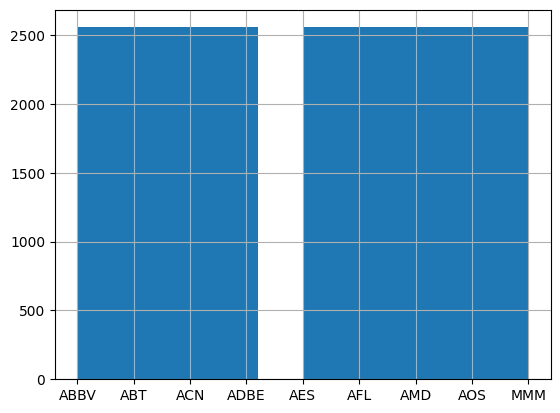

In [35]:
df['ticker'].hist()

<Axes: >

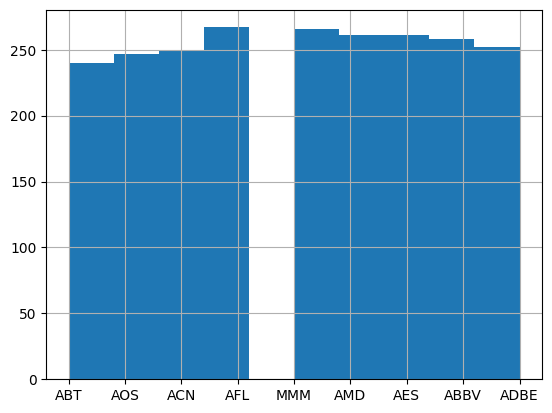

In [37]:
simple_sample_dt['ticker'].hist()

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: >

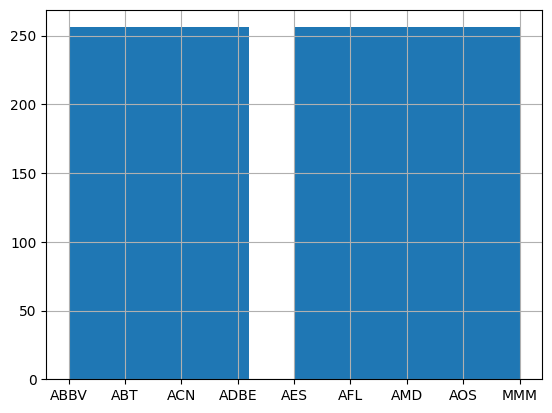

In [38]:
strat_sample_dt = df.groupby(['ticker']).sample(frac = 0.1) # getting 10% of each tech
strat_sample_dt['ticker'].hist()

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\Ramin\AppData\Local\Temp\ipykernel_11396\2911641312.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd_dt = (dd_dt


<Axes: >

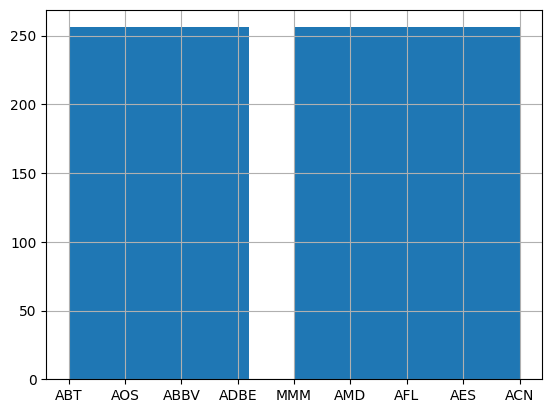

In [39]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('ticker', group_keys=False) # we do not want a grouped df at the end
                      .apply(lambda x: x.sample(frac = 0.1)).compute())
strat_sample_dd_dt.reset_index()['ticker'].hist()